We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

In [ ]:
#1 Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice.
# Any thing you would like us to know about the price?
#2 Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, 
# what alternatives you consider, and any concerns you have. How is the performance of your model?
#3 Help us understand how the price is predicted (again, a few sentences will suffice)

# Answers summary:
# 1 The provided data is a table with each raw as individual purchase record and each column as a feature of the records.
#     We preprocess the data by transforming the text records into numerical data, extracting the month of year, day of month, 
#      and weekday from the purchase date feature, and transforming the categorical data into dummy values. We also remove or
#     fill the missing data. 
#     We calculate the basic statistics of each feature, plotting their distribution histograms and the correlations between 
#     features. 
# 2 We first use some pre-processing models to account for the inflations of the price and cost, and de-correlate the features
#   that are going to be used for the regression models.
#   To determine the price for a purchase based on the features on that purchase, we train/compare some regression models based 
#   on the provided hitorical data. Multiple models are used. One type of the model is linear regression model. Another type is
#   the tree-based model, or decision tree(s). To access the performance of the model, we split the data into two data sets, 
#    one set is used to train the model, the other set is used to test the model's performance by some metrics, like how much
#   is the sum of the absolute differeces between the predicted price and the actuall price. We find the tree-based models 
#   outperforms the linear regression models. The tree-based models predict the price well as indicated by the metrics.
#   In the current case, tree-based models are better, probably there is non-linear relation between the feature and price; and
#   also our features are mixture of numerical and categorical data.

# 3 In our case, the best model to predict the price is a decision tree model. In this model, we have built a tree to help 
#   determing the price. We strat from the top node (root) of the tree, which asks a quetion about one feature of the product
#   to be purchased, based on the answer we move to the left node or the right node under the current node, then another
#   question about one feature will be asked. We repeat until moving to one bottom node (leaf), in which a predict price is 
#   shown.
#   From the tree we could also see that the features used in the questions of the nodes are those important in
#    determing the price. 

In [ ]:
# 0. Our goal is to build a machine learning model to predict the price of XoX based on the features (like cost, maker, size, 
# etc.) of each product. To build the model we use the historical data of XoX, which is presented in below:

In [ ]:
# 1. Preprocess, clean, analyze and visualized the provided data. 

In [341]:
import pandas as pd

df1 = pd.read_csv('../data/sales.csv')
df = df1.dropna(subset=['price']).reset_index(drop=True)

In [342]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [344]:
df.iloc[383:387]

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
383,$176k,"$211,272",2 Ton 970 Kg,May 26 2000,D,advanced,M14352,"IN732714,IN732362,IN732678,IN732691,IN732658",2.24 meters,106 cm,28 cm
384,$15k,"$82,365",3 Ton 660 Kg,Apr 24 2015,H,super advanced,M14282,"IN732660,IN732909",1.85 meters,129 cm,34 cm
385,$113k,"$71,204",3 Ton 20 Kg,Mar 30 2001,"D,R",advanced,NaN,"IN732910,IN732658",2.16 meters,109 cm,29 cm
386,$584k,"$748,165",3 Ton 0 Kg,Apr 05 2013,C,intermediate,"M14353,M14354","IN732911,IN732912,IN732384,IN732785,IN732913,I...",2.3 meters,105 cm,28 cm


In [345]:
len(df)

3186

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cost           2211 non-null   object
 1   price          3186 non-null   object
 2   weight         3183 non-null   object
 3   purchase_date  3186 non-null   object
 4   product_type   3186 non-null   object
 5   product_level  3186 non-null   object
 6   maker          2365 non-null   object
 7   ingredient     2932 non-null   object
 8   height         3186 non-null   object
 9   width          3183 non-null   object
 10  depth          3183 non-null   object
dtypes: object(11)
memory usage: 273.9+ KB


In [ ]:
#1.1 the data set has 10 features in addition to 'price' (totally 11 columns) and 3186 records (rows).

#1.2 These features can be devided into three types based on the data type: numerical (feature 'cost', 'price', 'weight', 
#'height' 'width', 'depth'); time (feature 'purchase_type'); category (feature 'product_type', 'product_level', 'maker', 
#'ingredient').

#1.3 Below is a visualization the data of each feature:

In [ ]:
#1.3.1 Price range is $3.13K~ $2.95M, median price is $111K
#1.3.2 Cost range is $3.0K~ $945K, median cost is $122K
#1.3.3 Weight range is 2.63 ton~ $4.12 ton, mean weight is 3.07 ton
#1.3.4 height range is 1.7 ~ 3.5 meters, mean height is 2.63 meters
#1.3.5 width range is 83 ~ 129 cm, mean width is 99.9cm
#1.3.6 depth range is 22~ 34 cm, mean depth is 26.2cm

In [346]:
import matplotlib.pylab as plt
%matplotlib inline

def weight2num(x):
    """
    This function transform weight string to numerical value.
    """
    if type(x) == str: 
        y = x.split(" Ton ")    
        return float(y[0]) * 1000 + float(y[1].replace(' Kg',''))
    else:
        return x


price_num = df['price'].map(lambda x: x if type(x)==float else float(x.strip('$').replace(',','')))
cost_num = df['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
weight_num = df['weight'].map(weight2num)
height_num = df['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
width_num = df['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
depth_num = df['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))

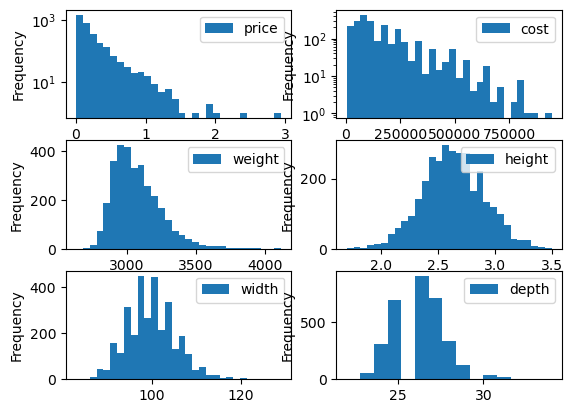

In [347]:
plt.subplot(3, 2, 1)
price_num.plot(kind='hist', bins=30, log=True, label='price', xlabel='[$]')
plt.legend(loc=1)
plt.subplot(3, 2, 2)
cost_num.plot(kind='hist', bins=30, log=True, label='cost', xlabel='[$]', ylabel='')
plt.legend(loc=1)
plt.subplot(3, 2, 3)
weight_num.plot(kind='hist', bins=30, label='weight', xlabel='[kg]')
plt.legend(loc=1)
plt.subplot(3, 2, 4)
height_num.plot(kind='hist', bins=30, label='height', xlabel='[meter]', ylabel='')
plt.legend(loc=1)
plt.subplot(3, 2, 5)
width_num.plot(kind='hist', bins=30, label='width', xlabel='[cm]')
plt.legend(loc=1)
plt.subplot(3, 2, 6)
depth_num.plot(kind='hist', bins=15, label='depth', xlabel='[cm]', ylabel='')
plt.legend(loc=1)

In [348]:
import statistics as statistics

print('max price: {0:.2e}'.format(max(price_num)))
print('mim price: {0:.2e}'.format(min(price_num)))
#print('mean price: {0:.2e}'.format(sum(price_num)/price_num.count()))
print('mean price: {0:.2e}'.format(statistics.mean(price_num.tolist())))
print('median price: {0:.2e}'.format(statistics.median(price_num.tolist())))

print('max cost: {0:.2e}'.format(max(cost_num)))
print('mim cost: {0:.2e}'.format(min(cost_num)))
print('mean cost: {0:.2e}'.format(statistics.mean(cost_num.dropna().tolist())))
print('median cost: {0:.2e}'.format(statistics.median(cost_num.dropna().tolist())))

print('max weight: {0:.2e}'.format(max(weight_num)))
print('mim weight: {0:.2e}'.format(min(weight_num)))
print('mean weight: {0:.2e}'.format(statistics.mean(weight_num.dropna().tolist())))
print('median weight: {0:.2e}'.format(statistics.median(weight_num.dropna().tolist())))

print('max height: {0:.2e}'.format(max(height_num)))
print('mim height: {0:.2e}'.format(min(height_num)))
print('mean height: {0:.2e}'.format(statistics.mean(height_num.dropna().tolist())))
print('median height: {0:.2e}'.format(statistics.median(height_num.dropna().tolist())))

print('max width: {0:.2e}'.format(max(width_num)))
print('mim width: {0:.2e}'.format(min(width_num)))
print('mean width: {0:.2e}'.format(statistics.mean(width_num.dropna().tolist())))
print('median width: {0:.2e}'.format(statistics.median(width_num.dropna().tolist())))

print('max depth: {0:.2e}'.format(max(depth_num)))
print('mim depth: {0:.2e}'.format(min(depth_num)))
print('mean depth: {0:.2e}'.format(statistics.mean(depth_num.dropna().tolist())))
print('median depth: {0:.2e}'.format(statistics.median(depth_num.dropna().tolist())))

max price: 2.95e+06
mim price: 3.13e+03
mean price: 1.82e+05
median price: 1.11e+05
max cost: 9.45e+05
mim cost: 3.00e+03
mean cost: 1.69e+05
median cost: 1.22e+05
max weight: 4.12e+03
mim weight: 2.63e+03
mean weight: 3.07e+03
median weight: 3.04e+03
max height: 3.50e+00
mim height: 1.70e+00
mean height: 2.63e+00
median height: 2.62e+00
max width: 1.29e+02
mim width: 8.30e+01
mean width: 9.99e+01
median width: 9.90e+01
max depth: 3.40e+01
mim depth: 2.20e+01
mean depth: 2.62e+01
median depth: 2.60e+01


In [ ]:
#1.3.7 Date range is from 1996-08-09 to 2017-10-06, spanning 21 years and 2 months
#1.3.7.1 The purchase amount is relative stable across years
#1.3.7.2 The purchase amount is clearly depedent on month, day of the month and weekday

In [352]:
purchase_date = pd.to_datetime(df['purchase_date'])

In [353]:
print(('earliest date: ' + purchase_date.min().strftime('%Y-%m-%d')))
print(('latest date: ' + purchase_date.max().strftime('%Y-%m-%d')))
print(('Time spans: ' + str(purchase_date.max().year-purchase_date.min().year) + ' years and ' + \
       str(purchase_date.max().month-purchase_date.min().month) + ' months'))

earliest date: 1996-08-09
latest date: 2017-10-06
Time spans: 21 years and 2 months


In [354]:
#convert all timestamps to year count from the first year of the record
purchase_date_year_cnt = purchase_date.map(lambda x: (x.year - purchase_date.min().year))

#convert all timestamps to month count from the first month of the record
purchase_date_month_cnt = purchase_date.map(lambda x: (x.year - purchase_date.min().year) * 12 + \
                                            (x.month - purchase_date.min().month))
#get purchase month, day and weekday
purchase_date_month = purchase_date.map(lambda x: x.month)
purchase_date_day = purchase_date.map(lambda x: x.day)
purchase_date_weekday = purchase_date.map(lambda x: x.weekday())



<AxesSubplot:title={'center':'Monthly Counts'}, xlabel='month count'>

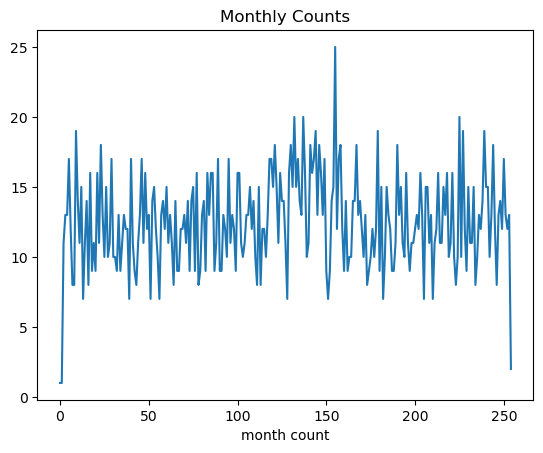

In [355]:
purchase_date_month_cnt.groupby(purchase_date_month_cnt).count().plot(title='Monthly Counts',xlabel='month count')

<AxesSubplot:title={'center':'Purchase counts by month of year'}, xlabel='month #'>

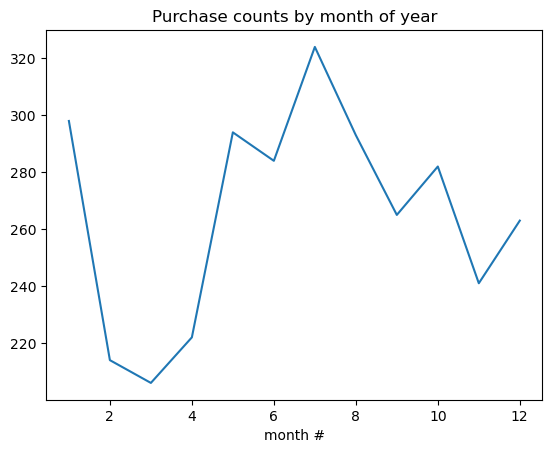

In [356]:
purchase_date_month.groupby(purchase_date_month).count().plot(title='Purchase counts by month of year',xlabel='month #')

<AxesSubplot:title={'center':'Purchase counts by day of month'}, xlabel='day #'>

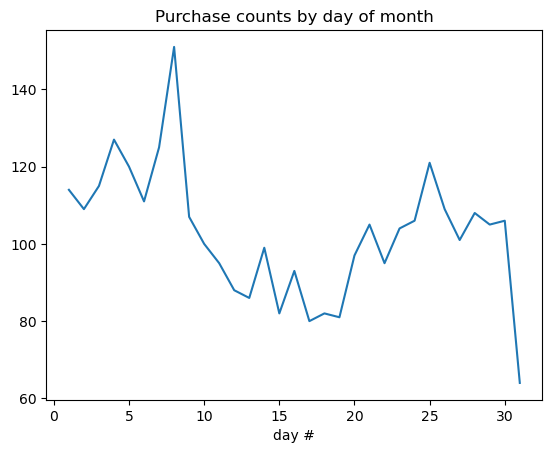

In [357]:
purchase_date_day.groupby(purchase_date_day).count().plot(title='Purchase counts by day of month',xlabel='day #')

<AxesSubplot:title={'center':'Purchase counts by weekday'}, xlabel='weekday'>

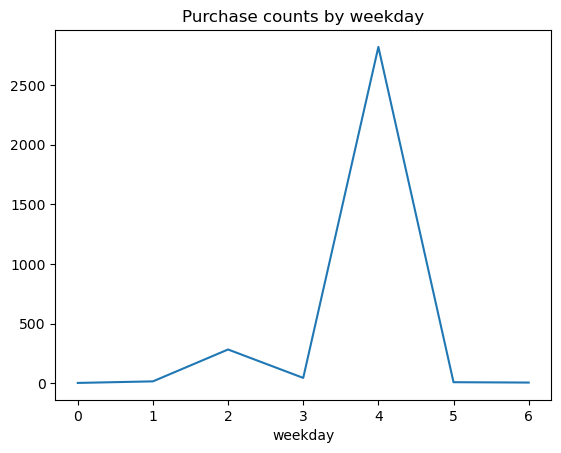

In [358]:
purchase_date_weekday.groupby(purchase_date_weekday).count().plot(title='Purchase counts by weekday',xlabel='weekday')

In [359]:
#1.3.8 Product types has 64 unique records, the most frequent record is 'D' and is 15% of all records. 
        # 25 records have more than 1% of the population. They totally takes 81% of all records
#1.3.8.1 When decomposed into signle categorical values, product type has 23 unique records.
        #most frequent product type : D  frequency: 35%, 16 records have more than 1% of the population.

#1.3.9 Product level has 5 unique records, the most frequent record is 'Advanced' and is 41% of all records. 
        # 4 records have more than 1% of the population. They totally takes 96% of all records
    
#1.3.10 Maker has 880 unique records, the most frequent record is 'M14196' and is less than 1% of all records. 
        # 0 records have more than 1% of the population.
#1.3.10.1 When decomposed into signle categorical values, maker has 888 unique records. None has more than 1%. 


#1.3.11 Ingredient has 2825 unique records, the most frequent record is 'IN732638' and is less than 1% of all records. 
        # 0 records have more than 1% of the population.
#1.3.10.1 When decomposed into signle categorical values, ingredient type has 2035 unique records.
        #most frequent product type : IN732658  frequency: 2%, 20 records have more than 1% of the population.


In [360]:
class Dummy_Transformer(object):
    
    def __init__(self):
        self.keys = set()    
    
    def fit(self, X, y=None):
        self.keys = self.get_keys(X)
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if type(item) == str:
                my_str = item.split(",")
                for str1 in my_str:
                    if str1 in self.keys:
                        res[str1][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_keys(self, X):
        return_set = set()
        for item in X:
            if type(item) == str:
                my_str = item.split(",")
                for str1 in my_str:
                    return_set.add(str1)
        return return_set    

In [401]:
print('product type unique records: ' + str(len(df['product_type'].unique())))
product_type_value_counts = df['product_type'].value_counts()
print(('most frequent product type : ' + product_type_value_counts.index[0] + '  frequency: ' + \
       str(round(float(product_type_value_counts[0])/len(df)*100)) + '%'))
product_type_value_counts_1pcnt_n = product_type_value_counts.map(lambda x: x > len(df) * 0.01).sum()
product_type_value_counts_1pcnt = product_type_value_counts.iloc[:product_type_value_counts_1pcnt_n]
product_type_value_counts_1pcnt = pd.concat([product_type_value_counts_1pcnt, \
                    pd.Series([product_type_value_counts.iloc[product_type_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(product_type_value_counts_1pcnt_n) + ' records have more than 1% of the population. They totally takes ' + \
       str(round(float(product_type_value_counts_1pcnt.iloc[:-2].sum())/len(df)*100)) + '% of all records'))

Dummy_Transformer_instance = Dummy_Transformer()
product_type_dummy_df = Dummy_Transformer_instance.fit_transform(df['product_type'])
#product_type_dummy_df.head()
product_type_dummy_value_counts = pd.Series(product_type_dummy_df.sum(), index = product_type_dummy_df.columns)
product_type_dummy_value_counts.sort_values(ascending=False, inplace=True)
print('When decomposed into signle categorical values, product type has ' + \
      str(len(product_type_dummy_value_counts)) + ' unique records.')
print(('most frequent product type : ' + product_type_dummy_value_count.index[0] + '  frequency: ' + \
       str(round(float(product_type_dummy_value_count[0])/len(df)*100)) + '%'))
product_type_dummy_value_counts_1pcnt_n = product_type_dummy_value_counts.map(lambda x: x > len(df) * 0.01).sum()
product_type_dummy_value_counts_1pcnt = product_type_dummy_value_counts.iloc[:product_type_dummy_value_counts_1pcnt_n]
product_type_dummy_value_counts_1pcnt = pd.concat([product_type_dummy_value_counts_1pcnt, \
        pd.Series([product_type_dummy_value_counts.iloc[product_type_dummy_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(product_type_dummy_value_counts_1pcnt_n) + ' records have more than 1% of the population.'))

print('')
print('product level unique records: ' + str(len(df['product_level'].unique())))
product_level_value_counts = df['product_level'].value_counts()
print(('most frequent level type : ' + product_level_value_counts.index[0] + '  frequency: ' + \
       str(round(float(product_level_value_counts[0])/len(df)*100)) + '%'))
product_level_value_counts_1pcnt_n = product_level_value_counts.map(lambda x: x > len(df) * 0.01).sum()
product_level_value_counts_1pcnt = product_level_value_counts.iloc[:product_level_value_counts_1pcnt_n]
product_level_value_counts_1pcnt = pd.concat([product_level_value_counts_1pcnt, \
                    pd.Series([product_level_value_counts.iloc[product_level_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(product_level_value_counts_1pcnt_n) + ' records have more than 1% of the population. They totally takes ' + \
       str(round(float(product_level_value_counts_1pcnt.iloc[:-2].sum())/len(df)*100)) + '% of all records'))
Dummy_Transformer_instance = Dummy_Transformer()
product_level_dummy_df = Dummy_Transformer_instance.fit_transform(df['product_level'])


print('')
print('maker unique records: ' + str(len(df['maker'].unique())))
maker_value_counts = df['maker'].value_counts()
print(('most frequent maker : ' + maker_value_counts.index[0] + '  frequency: ' + \
       str(round(float(maker_value_counts[0])/len(df)*100)) + '%'))
maker_value_counts_1pcnt_n = maker_value_counts.map(lambda x: x > len(df) * 0.01).sum()
maker_value_counts_1pcnt = maker_value_counts.iloc[:maker_value_counts_1pcnt_n]
maker_value_counts_1pcnt = pd.concat([maker_value_counts_1pcnt, \
                    pd.Series([maker_value_counts.iloc[maker_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(maker_value_counts_1pcnt_n) + ' records have more than 1% of the population.'))

Dummy_Transformer_instance = Dummy_Transformer()
maker_dummy_df = Dummy_Transformer_instance.fit_transform(df['maker'])
maker_dummy_df.head()
maker_dummy_value_counts = pd.Series(maker_dummy_df.sum(), index = maker_dummy_df.columns)
maker_dummy_value_counts.sort_values(ascending=False, inplace=True)
print('When decomposed into signle categorical values, maker has ' + \
      str(len(maker_dummy_value_counts)) + ' unique records.')
print(('most frequent maker : ' + maker_dummy_value_counts.index[0] + '  frequency: ' + \
       str(round(float(maker_dummy_value_counts[0])/len(df)*100)) + '%'))

print('')
print('ingredient unique records: ' + str(len(df['ingredient'].unique())))
ingredient_value_counts = df['ingredient'].value_counts()
print(('most frequent ingredient : ' + ingredient_value_counts.index[0] + '  frequency: ' + \
       str(round(float(ingredient_value_counts[0])/len(df)*100)) + '%'))
ingredient_value_counts_1pcnt_n = ingredient_value_counts.map(lambda x: x > len(df) * 0.01).sum()
ingredient_value_counts_1pcnt = ingredient_value_counts.iloc[:ingredient_value_counts_1pcnt_n]
ingredient_value_counts_1pcnt = pd.concat([ingredient_value_counts_1pcnt, \
                    pd.Series([ingredient_value_counts.iloc[ingredient_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(ingredient_value_counts_1pcnt_n) + ' records have more than 1% of the population.'))

Dummy_Transformer_instance = Dummy_Transformer()
ingredient_dummy_df = Dummy_Transformer_instance.fit_transform(df['ingredient'])
#ingredient_dummy_df.head()
ingredient_dummy_value_counts = pd.Series(ingredient_dummy_df.sum(), index = ingredient_dummy_df.columns)
ingredient_dummy_value_counts.sort_values(ascending=False, inplace=True)
print('When decomposed into signle categorical values, ingredient has ' + \
      str(len(ingredient_dummy_value_counts)) + ' unique records.')
print(('most frequent ingredient : ' + ingredient_dummy_value_counts.index[0] + '  frequency: ' + \
       str(round(float(ingredient_dummy_value_counts[0])/len(df)*100)) + '%'))

ingredient_dummy_value_counts_1pcnt_n = ingredient_dummy_value_counts.map(lambda x: x > len(df) * 0.01).sum()
ingredient_dummy_value_counts_1pcnt = ingredient_dummy_value_counts.iloc[:ingredient_dummy_value_counts_1pcnt_n]
ingredient_dummy_value_counts_1pcnt = pd.concat([ingredient_dummy_value_counts_1pcnt, \
        pd.Series([ingredient_dummy_value_counts.iloc[ingredient_dummy_value_counts_1pcnt_n:].sum()], index=['others'])])
print((str(ingredient_dummy_value_counts_1pcnt_n) + ' records have more than 1% of the population.'))

product type unique records: 64
most frequent product type : D  frequency: 15%
25 records have more than 1% of the population. They totally takes 81% of all records
When decomposed into signle categorical values, product type has 23 unique records.
most frequent product type : D  frequency: 35%
16 records have more than 1% of the population.

product level unique records: 5
most frequent level type : advanced  frequency: 41%
4 records have more than 1% of the population. They totally takes 96% of all records

maker unique records: 880
most frequent maker : M14196  frequency: 1%
0 records have more than 1% of the population.
When decomposed into signle categorical values, maker has 888 unique records.
most frequent maker : M14196  frequency: 1%

ingredient unique records: 2825
most frequent ingredient : IN732638  frequency: 0%
0 records have more than 1% of the population.
When decomposed into signle categorical values, ingredient has 2035 unique records.
most frequent ingredient : IN73

<AxesSubplot:title={'center':'product type'}, ylabel='None'>

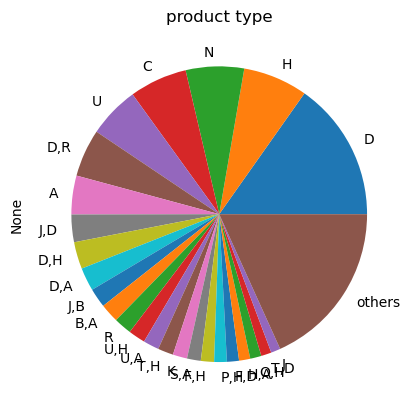

In [362]:
product_type_value_counts_1pcnt.plot(kind='pie', title='product type')

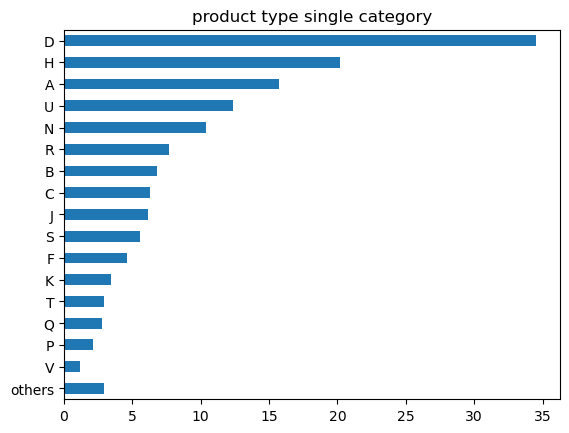

In [363]:
ax1 = product_type_dummy_value_counts_1pcnt.map(lambda x: float(x)/len(df)*100).plot(kind='barh', \
                                                        title='product type single category')
ax1.invert_yaxis()

<AxesSubplot:title={'center':'Product level'}, ylabel='product_level'>

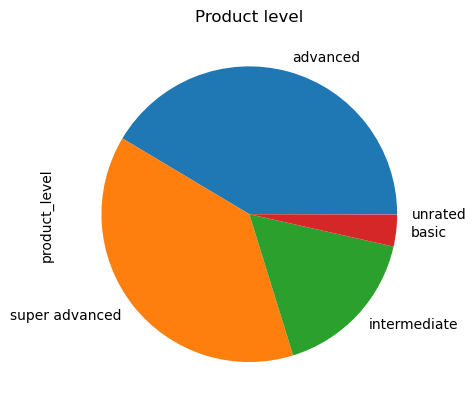

In [364]:
df.product_level.value_counts().plot(kind='pie', title = 'Product level')

In [ ]:
# 2 Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, 
# what alternatives you consider, and any concerns you have. How is the performance of your model?

In [ ]:
# 2.0 The machine learning model should have adequate pridiction power while should not be too complex as to enable 
# interpretation how each feature contributes to the predition. To make sure the model is not too complex, we first test each 
# individual feature to see how much it possibly help prediting the price.

In [ ]:
# 2.1 individual feature testing and further pre-processing

In [ ]:
# 2.1.1 price. From the below we could see increases of the price until year 2010. Because we are going to use a tree model. 
# To make use of all the data for training the model, we comupted the inflation-controlld price. 
# Alternatively, we may use one model to predict the inflation-unadjusted price, and other to account for the inflations.
# We must be very careful not to leak any testing data set to the training data when doing this
# Same applied to the cost but not other numberical data (because an inspection finds no changes over time).

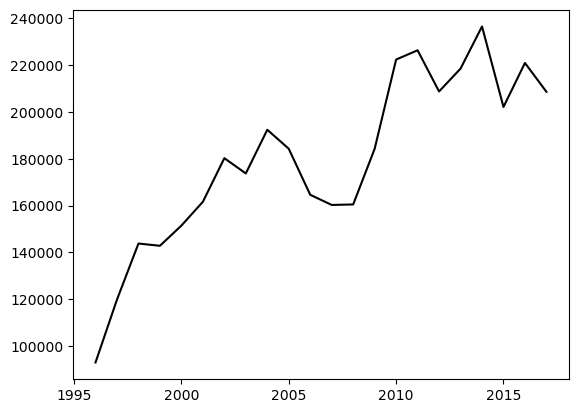

In [365]:
new_df = pd.DataFrame()
new_df['price'] = price_num
new_df['year'] = purchase_date.map(lambda x: x.year)
year_avg = pd.DataFrame({'year': new_df.year, 'price': new_df.price}).groupby('year').mean()

plt.plot(year_avg.index, year_avg,'k')

In [366]:
year_avg_dict=year_avg.to_dict()
year_avg_dict=year_avg_dict['price']
max_year_price=year_avg[year_avg.index < 2015].max()
new_df['price_norm']=new_df.apply(lambda x: x['price']/year_avg_dict[x['year']]*max_year_price, axis=1)
price_num_norm = new_df['price_norm']
#year_avg_norm = new_df.groupby('year').mean()
#plt.plot(year_avg_norm.index, year_avg_norm.price_norm,'k')

In [ ]:
# 2.1.2 cost. Control for the inflation.

In [367]:
new_df = pd.DataFrame()
new_df['cost'] = cost_num
new_df['year'] = purchase_date.map(lambda x: x.year)
year_avg = pd.DataFrame({'year': new_df.year, 'cost': new_df.cost}).groupby('year').mean()
year_avg_dict=year_avg.to_dict()
year_avg_dict=year_avg_dict['cost']
max_year_cost=year_avg[year_avg.index < 2015].max()
new_df['cost_norm']=new_df.apply(lambda x: x['cost']/year_avg_dict[x['year']]*max_year_cost, axis=1)
cost_num_norm = new_df['cost_norm']
#year_avg_norm = new_df.groupby('year').mean()
#plt.plot(year_avg_norm.index, year_avg_norm.cost_norm,'k')

In [ ]:
# 2.1.3 feature selection: numerical data: all numerical feactures have some correlation to the price.

In [368]:
df_test = pd.DataFrame()
df_test['price'] = price_num_norm
df_test['cost'] = cost_num_norm
df_test['weight'] = weight_num
df_test['height'] = height_num
df_test['width'] = width_num
df_test['depth'] = depth_num
df_test.corr()

,price,cost,weight,height,width,depth
price,1.000000,0.602538,0.303818,0.084054,0.077781,0.081463
cost,0.602538,1.000000,0.367436,0.084823,0.116798,0.114597
weight,0.303818,0.367436,1.000000,0.176519,0.352570,0.343021
height,0.084054,0.084823,0.176519,1.000000,-0.851370,-0.837142
width,0.077781,0.116798,0.352570,-0.851370,1.000000,0.979355
depth,0.081463,0.114597,0.343021,-0.837142,0.979355,1.000000


In [ ]:
# 2.1.4 feature selection: date related: Treated as numerical or categorical, none of the month, day of month or weekday
# variables seem to predict the price by a decision tree model.

In [369]:
class Dummy_Transformer_Numerical(object):
    
    def __init__(self):
        self.keys = set()    
    
    def fit(self, X, y=None):
        self.keys = X.unique()
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            res[item][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    

In [370]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [379]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, purchase_date_month], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
#tmp_array=train_raw['purchase_date'].value
dtr.fit(train_raw['purchase_date'].array.reshape(-1, 1), train_raw['price'])

y_train_pred = dtr.predict(train_raw['purchase_date'].array.reshape(-1, 1))
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw['purchase_date'].array.reshape(-1, 1))
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.67e+05
train MSE: 6.42e+10
train R2: 0.098
test MAE: 1.99e+05
test MSE: 1.02e+11
test R2: 0.032


In [371]:
Dummy_Transformer_instance = Dummy_Transformer_Numerical()
month_dummy_df = Dummy_Transformer_instance.fit_transform(purchase_date_month)

new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, month_dummy_df], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_raw[[1, 2, 3, 4,5, 6, 7, 8,9, 10, 11, 12]], train_raw['price'])

y_train_pred = dtr.predict(train_raw[[1, 2, 3, 4,5, 6, 7, 8,9, 10, 11, 12]])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[[1, 2, 3, 4,5, 6, 7, 8,9, 10, 11, 12]])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.69e+05
train MSE: 6.55e+10
train R2: 0.079
test MAE: 1.99e+05
test MSE: 1.03e+11
test R2: 0.025


In [380]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, purchase_date_day], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
#tmp_array=train_raw['purchase_date'].value
dtr.fit(train_raw['purchase_date'].array.reshape(-1, 1), train_raw['price'])

y_train_pred = dtr.predict(train_raw['purchase_date'].array.reshape(-1, 1))
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw['purchase_date'].array.reshape(-1, 1))
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.79e+05
train MSE: 7.06e+10
train R2: 0.008
test MAE: 2.04e+05
test MSE: 1.06e+11
test R2: -0.010


In [372]:
Dummy_Transformer_instance = Dummy_Transformer_Numerical()
day_dummy_df = Dummy_Transformer_instance.fit_transform(purchase_date_day)

new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, day_dummy_df], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_raw[[i for i in range(1,32)]], train_raw['price'])

y_train_pred = dtr.predict(train_raw[[i for i in range(1,32)]])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[[i for i in range(1,32)]])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))




train MAE: 1.78e+05
train MSE: 7.06e+10
train R2: 0.007
test MAE: 2.04e+05
test MSE: 1.06e+11
test R2: -0.005


In [381]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, purchase_date_weekday], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
#tmp_array=train_raw['purchase_date'].value
dtr.fit(train_raw['purchase_date'].array.reshape(-1, 1), train_raw['price'])

y_train_pred = dtr.predict(train_raw['purchase_date'].array.reshape(-1, 1))
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw['purchase_date'].array.reshape(-1, 1))
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.77e+05
train MSE: 6.97e+10
train R2: 0.021
test MAE: 2.03e+05
test MSE: 1.06e+11
test R2: -0.010


In [373]:
Dummy_Transformer_instance = Dummy_Transformer_Numerical()
weekday_dummy_df = Dummy_Transformer_instance.fit_transform(purchase_date_weekday)

new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, weekday_dummy_df], axis =1)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_raw[[i for i in range(7)]], train_raw['price'])

y_train_pred = dtr.predict(train_raw[[i for i in range(7)]])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[[i for i in range(7)]])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.77e+05
train MSE: 6.98e+10
train R2: 0.019
test MAE: 2.03e+05
test MSE: 1.06e+11
test R2: -0.009


In [ ]:
# 2.1.5 feature selection: other categorical data: product type has some impacts on price precdition, product level, maker and 
# ingredient don't contribute too much.

In [397]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, product_type_dummy_df], axis =1)
features_train = list(new_df.columns)
features_train.remove('price')
features_train.remove('year')
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_raw[features_train], train_raw['price'])

y_train_pred = dtr.predict(train_raw[features_train])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[features_train])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.71e+05
train MSE: 6.49e+10
train R2: 0.089
test MAE: 1.82e+05
test MSE: 8.23e+10
test R2: 0.219


In [402]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, product_level_dummy_df], axis =1)
features_train = list(new_df.columns)
features_train.remove('price')
features_train.remove('year')
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train_raw[features_train], train_raw['price'])

y_train_pred = dtr.predict(train_raw[features_train])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[features_train])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.76e+05
train MSE: 6.87e+10
train R2: 0.035
test MAE: 1.96e+05
test MSE: 1.01e+11
test R2: 0.045


In [413]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, maker_dummy_df], axis =1)
features_train = list(new_df.columns)
features_train.remove('price')
features_train.remove('year')
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(train_raw[features_train], train_raw['price'])

y_train_pred = dtr.predict(train_raw[features_train])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[features_train])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.72e+05
train MSE: 6.22e+10
train R2: 0.126
test MAE: 1.99e+05
test MSE: 1.04e+11
test R2: 0.013


In [414]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
new_df = pd.concat([new_df, ingredient_dummy_df], axis =1)
features_train = list(new_df.columns)
features_train.remove('price')
features_train.remove('year')
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(train_raw[features_train], train_raw['price'])

y_train_pred = dtr.predict(train_raw[features_train])
print('train MAE: {0:.2e}'.format(mean_absolute_error(train_raw['price'], y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(train_raw['price'], y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(train_raw['price'], y_train_pred)))

y_test_pred = dtr.predict(test_raw[features_train])
print('test MAE: {0:.2e}'.format(mean_absolute_error(test_raw['price'], y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(test_raw['price'], y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(test_raw['price'], y_test_pred)))

train MAE: 1.69e+05
train MSE: 6.27e+10
train R2: 0.119
test MAE: 2.01e+05
test MSE: 1.05e+11
test R2: 0.001


In [ ]:
# 2.2 start formatting the data set for training and testing

In [419]:
new_df = pd.DataFrame()
new_df['price'] = price_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)

y_train = train_raw['price']

new_df = pd.DataFrame()
new_df['price'] = price_num
new_df['year'] = purchase_date.map(lambda x: x.year)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

y_test = test_raw['price']

In [422]:
new_df = pd.DataFrame()
new_df['cost'] = cost_num_norm
new_df['year'] = purchase_date.map(lambda x: x.year)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)

cost_train = train_raw['cost']

new_df = pd.DataFrame()
new_df['cost'] = cost_num
new_df['year'] = purchase_date.map(lambda x: x.year)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)

cost_test = test_raw['cost']

In [434]:
new_df = pd.DataFrame()
new_df['weight'] = weight_num
new_df['height'] = height_num
new_df['width'] = width_num
new_df['depth'] = depth_num
new_df['purchase_month'] = purchase_date_month
new_df['purchase_day'] = purchase_date_day
new_df['purchase_weekday'] = purchase_date_weekday
new_df = pd.concat([new_df, product_type_dummy_df, product_level_dummy_df, maker_dummy_df, ingredient_dummy_df], axis =1)

In [443]:
new_df['year'] = purchase_date.map(lambda x: x.year)
train_raw = new_df[new_df.year < 2015].reset_index(drop=True)
test_raw = new_df[new_df.year >= 2015].reset_index(drop=True)
train_raw.drop(['year'], axis=1, inplace=True)
test_raw.drop(['year'], axis=1, inplace=True)

train_raw['cost'] = cost_train
test_raw['cost'] = cost_test

In [453]:
train_cost_mean = train_raw['cost'].mean()
train_raw['cost'].fillna(train_cost_mean, inplace=True)
test_raw['cost'].fillna(train_cost_mean, inplace=True)
train_weight_mean = train_raw['weight'].mean()
train_raw['weight'].fillna(train_weight_mean, inplace=True)
test_raw['weight'].fillna(train_weight_mean, inplace=True)
train_height_mean = train_raw['height'].mean()
train_raw['height'].fillna(train_height_mean, inplace=True)
test_raw['height'].fillna(train_height_mean, inplace=True)
train_width_mean = train_raw['width'].mean()
train_raw['width'].fillna(train_width_mean, inplace=True)
test_raw['width'].fillna(train_width_mean, inplace=True)
train_depth_mean = train_raw['depth'].mean()
train_raw['depth'].fillna(train_depth_mean, inplace=True)
test_raw['depth'].fillna(train_depth_mean, inplace=True)


In [457]:
test_raw[test_raw.isna().any(axis=1)]

,weight,height,width,depth,purchase_month,purchase_day,purchase_weekday,O,L,W,...,IN733430,IN733858,IN732116,IN733980,IN733290,IN732586,IN732825,IN733049,IN733023,cost


In [458]:
X_train = train_raw
X_test = test_raw

In [ ]:
# 2.2.1 PCA analysis of all numerical data (expect price). Multi-Collinearity will affect the interpretation of the results of
# machine learning model. So we need to de-correlate the features.

In [ ]:
# 2.3 Use different machine learning models to predict the price. The linear regression model generally overfits, even after 
# adding regularization. That's probably because the relation between the predicting features and the price is non-linear; also
# many features are categorical instead of numerical. Decision tree-based regression performs better. The ensemble method 
# further improves the performance. The loss function for training and testing are comparable, indicating the model could 
# predict the price adequately.

In [ ]:
# goal test mse < 5.10 e10 r2 > .408

In [ ]:
# 2.3.1 linear regression with Lasso regularization (use Lasso because of high dimensio of training data matrix)

In [459]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

#just set alpha = 1.0
steps = [('rescale', MinMaxScaler()),
         ('la', linear_model.Lasso(alpha=1.0, max_iter=100000))]

model = Pipeline(steps)
model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 3.31e+04
train MSE: 3.56e+09
train R2: 0.950
test MAE: 4.58e+05
test MSE: 4.47e+11
test R2: -4.185


In [511]:
#set alpha = 100
steps = [('rescale', MinMaxScaler()),
         ('la', linear_model.Lasso(alpha=100.0, max_iter=100000))]

model = Pipeline(steps)
model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 9.62e+04
train MSE: 1.73e+10
train R2: 0.757
test MAE: 1.56e+05
test MSE: 6.04e+10
test R2: 0.300


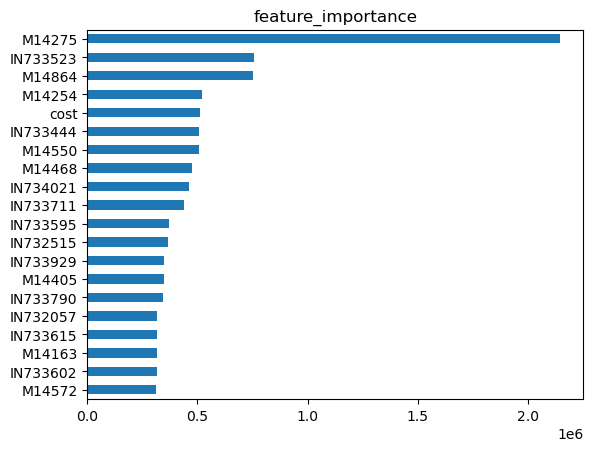

In [474]:
feature_importance = pd.Series(model[1].coef_, index = X_train.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.iloc[:20].plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [512]:
model_save_Lasso = model

In [ ]:
# 2.3.2 Decision Tree (just for inspection, we have ensemble methods coming next)

In [475]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = dtr.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))


train MAE: 1.40e+05
train MSE: 4.27e+10
train R2: 0.399
test MAE: 1.45e+05
test MSE: 5.40e+10
test R2: 0.373


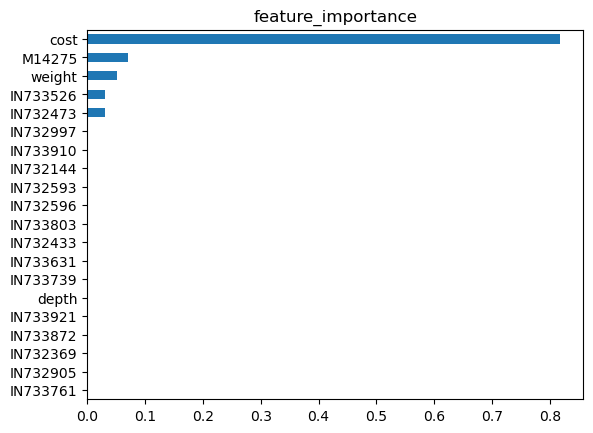

In [476]:
feature_importance = pd.Series(dtr.feature_importances_, index = X_train.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.iloc[:20].plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [477]:
# 2.3.3 Random forest

In [478]:
from sklearn.ensemble import RandomForestRegressor

rtf = RandomForestRegressor(n_estimators = 10, max_depth=3, min_samples_split=5, min_samples_leaf=1)
rtf.fit(X_train, y_train)

y_train_pred = rtf.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = rtf.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))


train MAE: 1.39e+05
train MSE: 4.15e+10
train R2: 0.416
test MAE: 1.44e+05
test MSE: 5.40e+10
test R2: 0.374


In [488]:
# tuning hyper-parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

scorer_method = make_scorer(mean_squared_error, greater_is_better=False)


rfr = RandomForestRegressor(n_estimators=100, max_features = 0.9, random_state=2023)


max_depths = range(1, 10)
#min_samples_splits = range(2, 7)
min_samples_leaf = range(1,9)
#max_features = [0.5, 0.7, 0.9]

grid = dict()
grid['max_depth'] = max_depths
#grid['min_samples_split'] = min_samples_splits 
grid['min_samples_leaf'] = min_samples_leaf
#grid['max_features'] = max_features 


search = GridSearchCV(rfr, param_grid = grid, scoring = scorer_method, \
                      cv = kf, n_jobs = -1, error_score = np.NaN).fit(X_train, y_train)



In [489]:
print('MAE: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: -43978136370.16987
Config: {'max_depth': 9, 'min_samples_leaf': 5}


In [490]:
y_train_pred = search.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = search.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.15e+05
train MSE: 2.91e+10
train R2: 0.591
test MAE: 1.34e+05
test MSE: 5.01e+10
test R2: 0.419


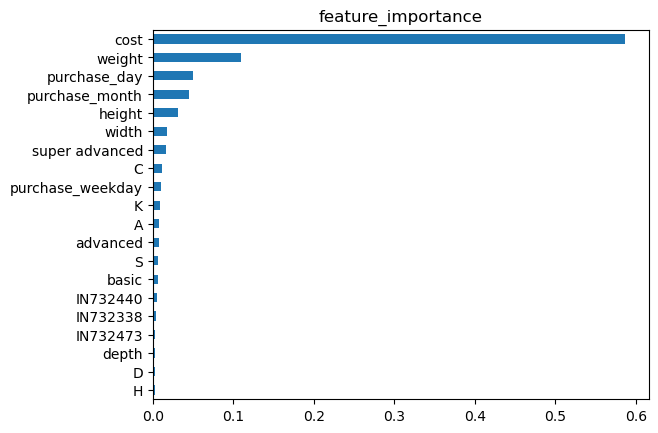

In [491]:
feature_importance = pd.Series(search.best_estimator_.feature_importances_, index = X_train.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.iloc[:20].plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [ ]:
# 2.3.4 Gradient boosting tree

In [487]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = gbr.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.18e+05
train MSE: 2.56e+10
train R2: 0.640
test MAE: 1.42e+05
test MSE: 5.21e+10
test R2: 0.395


In [501]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

scorer_method = make_scorer(mean_squared_error, greater_is_better=False)


gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=2023)


max_depths = range(1, 10)
#min_samples_splits = range(2, 7)
min_samples_leaf = range(1,9)
#max_features = [0.5, 0.7, 0.9]

grid = dict()
grid['max_depth'] = max_depths
#grid['min_samples_split'] = min_samples_splits 
grid['min_samples_leaf'] = min_samples_leaf
#grid['max_features'] = max_features 


search = GridSearchCV(gbr, param_grid = grid, scoring = scorer_method, \
                      cv = kf, n_jobs = -1, error_score = np.NaN).fit(X_train, y_train)

In [502]:
print('MAE: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: -41149686821.11185
Config: {'max_depth': 6, 'min_samples_leaf': 8}


In [503]:
y_train_pred = search.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = search.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.03e+05
train MSE: 2.15e+10
train R2: 0.698
test MAE: 1.31e+05
test MSE: 4.84e+10
test R2: 0.439


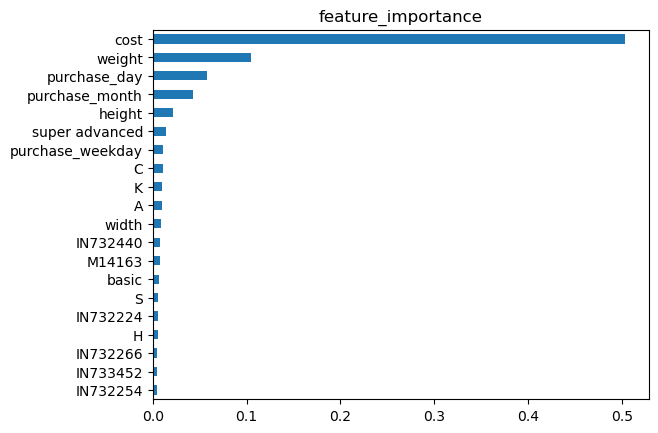

In [504]:
feature_importance = pd.Series(search.best_estimator_.feature_importances_, index = X_train.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.iloc[:20].plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [513]:
search_gbr_save = search

In [ ]:
# 2.3.4 Xgboosting tree

In [505]:
from xgboost import XGBRegressor

xgb = XGBRegressor(gamma = 0.1, max_depth = 10, min_child_weight = 2.0, subsample = 0.5, colsample_bytree = 0.5)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = xgb.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

C:\Users\liyuh\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


train MAE: 5.76e+04
train MSE: 5.48e+09
train R2: 0.923
test MAE: 1.45e+05
test MSE: 5.96e+10
test R2: 0.309


In [515]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

scorer_method = make_scorer(mean_squared_error, greater_is_better=False)


xgb = XGBRegressor(tree_method = 'hist', random_state=2023)


gamma = [x*0.1 for x in range(10)]
max_depth = range(1, 12)
min_child_weight = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10]
subsample = [0.5, 0.7, 0.9]
colsample_bytree = [0.5, 0.7, 0.9]


grid = dict()
grid['gamma'] = gamma
grid['max_depth'] = max_depths
grid['min_child_weight'] = min_child_weight 
grid['subsample'] = subsample
grid['colsample_bytree'] = colsample_bytree 


search = GridSearchCV(xgb, param_grid = grid, scoring = scorer_method, \
                      cv = kf, n_jobs = -1, error_score = np.NaN).fit(X_train, y_train)

search_xgb_save = search

C:\Users\liyuh\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [516]:
print('MAE: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: -41865688551.36971
Config: {'colsample_bytree': 0.5, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 5.0, 'subsample': 0.9}


In [517]:
y_train_pred = search.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = search.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.08e+05
train MSE: 2.33e+10
train R2: 0.673
test MAE: 1.32e+05
test MSE: 4.88e+10
test R2: 0.434


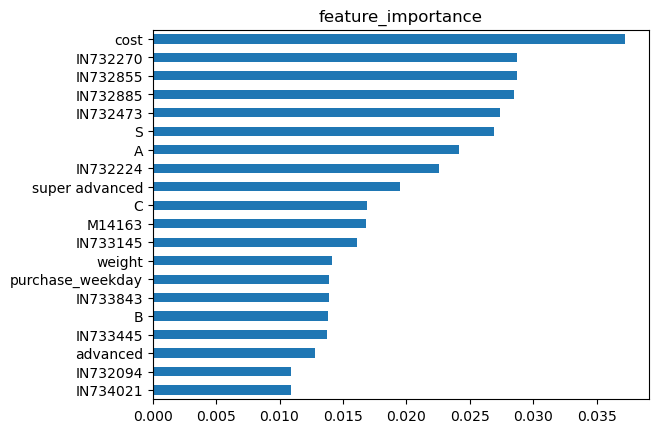

In [518]:
feature_importance = pd.Series(search.best_estimator_.feature_importances_, index = X_train.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.iloc[:20].plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [ ]:
# 3. Help us understand how the price is predicted (again, a few sentences will suffice).

In [ ]:
# The feature importance analysis reveals that cost is the most important predictor of the price. After cost, the weight, the 
# purchase date (month, day, weekday) and other features also contribue to the prediction of the price.